In [ ]:

"""
Notebook 1: Synthetic Data Generation using Heston Model
Generates option price data and implied volatility surfaces for testing
"""

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from models.heston import HestonModel


ModuleNotFoundError: No module named 'numpy'

In [4]:
heston = HestonModel(
    S0=100,
    v0=0.04,        
    kappa=2.0,
    theta=0.04,
    sigma=0.4,      
    rho=-0.7 
)       

In [ ]:
print("Model parameters:")
print(f"  Spot: ${heston.S0}")
print(f"  Initial vol: {np.sqrt(heston.v0)*100:.1f}%")
print(f"  Long-term vol: {np.sqrt(heston.theta)*100:.1f}%")
print(f"  Vol-of-vol: {heston.sigma*100:.1f}%")
print(f"  Mean reversion: {heston.kappa}")
print(f"  Correlation: {heston.rho}")

Parâmetros do Modelo:
  Spot: $100
  Vol inicial: 20.0%
  Vol long-term: 20.0%
  Vol-of-vol: 40.0%
  Mean reversion: 2.0
  Correlation: -0.7


In [ ]:

print(f"Generated {S.shape[0]} paths with {S.shape[1]} timesteps")

✅ Gerados 10000 paths com 253 timesteps


C:\Users\julia\AppData\Local\Temp\ipykernel_24264\2983834082.py:21: RuntimeWarning: invalid value encountered in sqrt
  axes[1, i].hist(np.sqrt(v[:, idx]), bins=50, density=True, alpha=0.7,


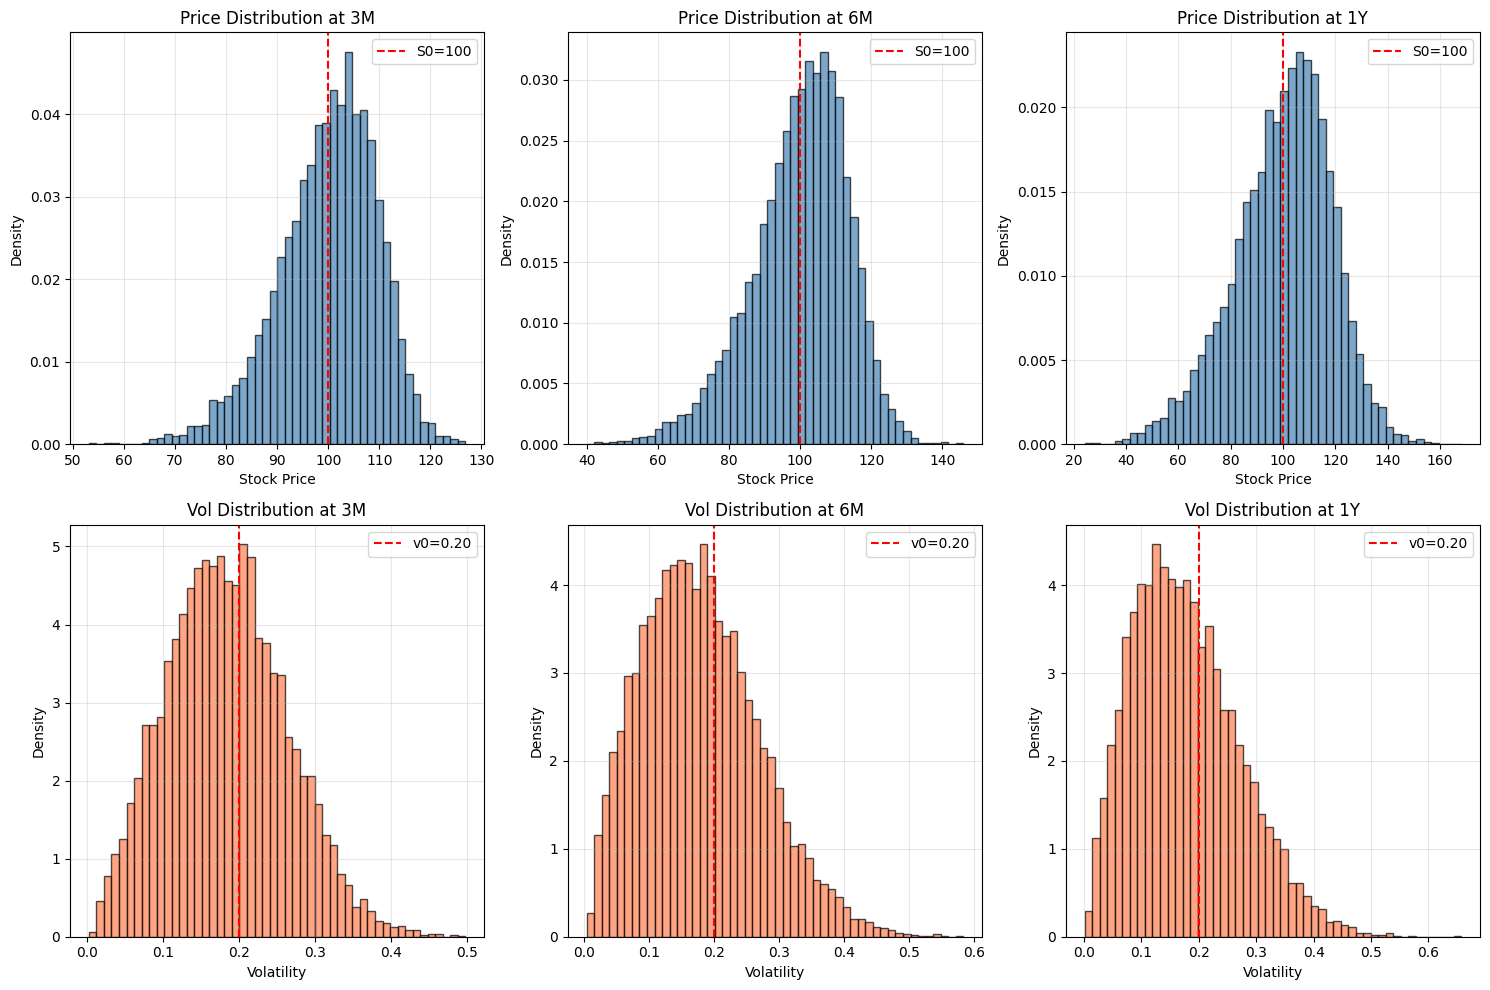

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Distributions at different time horizons
times_idx = [63, 126, 252]  # 3 months, 6 months, 1 year
times_label = ['3M', '6M', '1Y']

for i, (idx, label) in enumerate(zip(times_idx, times_label)):
    # Price distributions
    axes[0, i].hist(S[:, idx], bins=50, density=True, alpha=0.7, 
                    color='steelblue', edgecolor='black')
    axes[0, i].axvline(heston.S0, color='red', linestyle='--', 
                       label=f'S0={heston.S0}')
    axes[0, i].set_xlabel('Stock Price')
    axes[0, i].set_ylabel('Density')
    axes[0, i].set_title(f'Price Distribution at {label}')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Volatility distributions
    axes[1, i].hist(np.sqrt(v[:, idx]), bins=50, density=True, alpha=0.7,
                    color='coral', edgecolor='black')
    axes[1, i].axvline(np.sqrt(heston.v0), color='red', linestyle='--',
                       label=f'v0={np.sqrt(heston.v0):.2f}')
    axes[1, i].set_xlabel('Volatility')
    axes[1, i].set_ylabel('Density')
    axes[1, i].set_title(f'Vol Distribution at {label}')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/synthetic/marginal_distributions.png', dpi=150)
plt.show()

In [ ]:
print("\nGenerating option prices...")

maturities = [0.25, 0.5, 1.0]
strike_range = (0.8, 1.2)
n_strikes = 15

strikes_norm, vol_surface = heston.implied_volatility_surface(
    strike_range=strike_range,
    n_strikes=n_strikes,
    maturities=maturities
)

print(f"Surface generated: {n_strikes} strikes × {len(maturities)} maturities")


 Gerando preços de opções...
Superfície gerada: 15 strikes x 3 maturities


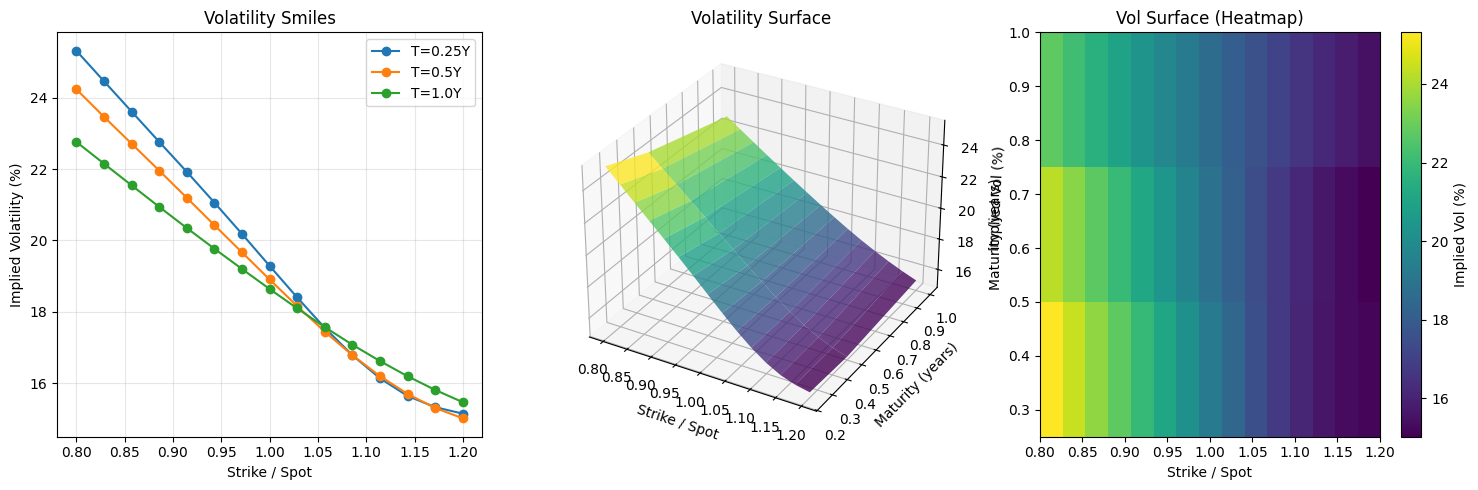

In [ ]:
fig = plt.figure(figsize=(15, 5))

# Plot 1: Volatility smiles for each maturity
ax1 = fig.add_subplot(131)
for T in maturities:
    ax1.plot(strikes_norm, vol_surface[T] * 100, 
             marker='o', label=f'T={T}Y')
ax1.set_xlabel('Strike / Spot')
ax1.set_ylabel('Implied Volatility (%)')
ax1.set_title('Volatility Smiles')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: 3D surface
from mpl_toolkits.mplot3d import Axes3D

ax2 = fig.add_subplot(132, projection='3d')

X, Y = np.meshgrid(strikes_norm, maturities)
Z = np.array([vol_surface[T] * 100 for T in maturities])

ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax2.set_xlabel('Strike / Spot')
ax2.set_ylabel('Maturity (years)')
ax2.set_zlabel('Implied Vol (%)')
ax2.set_title('Volatility Surface')

# Plot 3: Heatmap
ax3 = fig.add_subplot(133)
im = ax3.imshow(Z, aspect='auto', cmap='viridis', 
                extent=[strikes_norm[0], strikes_norm[-1], 
                       maturities[0], maturities[-1]],
                origin='lower')
ax3.set_xlabel('Strike / Spot')
ax3.set_ylabel('Maturity (years)')
ax3.set_title('Vol Surface (Heatmap)')
plt.colorbar(im, ax=ax3, label='Implied Vol (%)')

plt.tight_layout()
plt.savefig('../data/synthetic/volatility_surface.png', dpi=150)
plt.show()


In [ ]:
print("\nSaving data...")

np.savez('../data/synthetic/heston_data.npz',
         strikes=strikes_norm,
         maturities=maturities,
         vol_surface=np.array([vol_surface[T] for T in maturities]),
         params={'S0': heston.S0, 'v0': heston.v0, 'kappa': heston.kappa,
                'theta': heston.theta, 'sigma': heston.sigma, 'rho': heston.rho})

print("Data saved to: data/synthetic/heston_data.npz")


 Salvando dados...
Dados salvos em data/synthetic/heston_data.npz


In [ ]:
print("\nSurface statistics:")
print(f"  Strikes: {strikes_norm.min():.2f} - {strikes_norm.max():.2f}")
print(f"  Maturities: {min(maturities)} - {max(maturities)} years")
print(f"  Vol range: {np.min([vol_surface[T] for T in maturities])*100:.1f}% - "
      f"{np.max([vol_surface[T] for T in maturities])*100:.1f}%")
print(f"  ATM vol (T=1Y): {vol_surface[1.0][len(strikes_norm)//2]*100:.1f}%")


 Estatísticas da Superfície:
  Strikes: 0.80 - 1.20
  Maturities: 0.25 - 1.0 years
  Vol range: 15.0% - 25.3%
  ATM vol (T=1Y): 18.6%
